# State Space Models, Markov Chains, and Yoda Quotes

State space models can be used to describe all kinds of settings where you can describe any point in time as belonging to a specific state. Think of a board game where you roll a die to move your character forward or backward, like Chutes and Ladders, or Sorry!. There are only so many spaces your character can be on, and if there are 4 players, there is a finite number of arrangements of your 4 characters on the board. You can only move one character at a time, and that move is determined by a roll of the die. For each state that the board is in, there's a certain probability that you go to a new space based on the outcome of the roll, and that probability doesn't depend on what happened in the past, only on the state the board is in right now. A Markov chain models the probability of transitioning between states in our state space model, which allows us to simulate the process of playing the game.

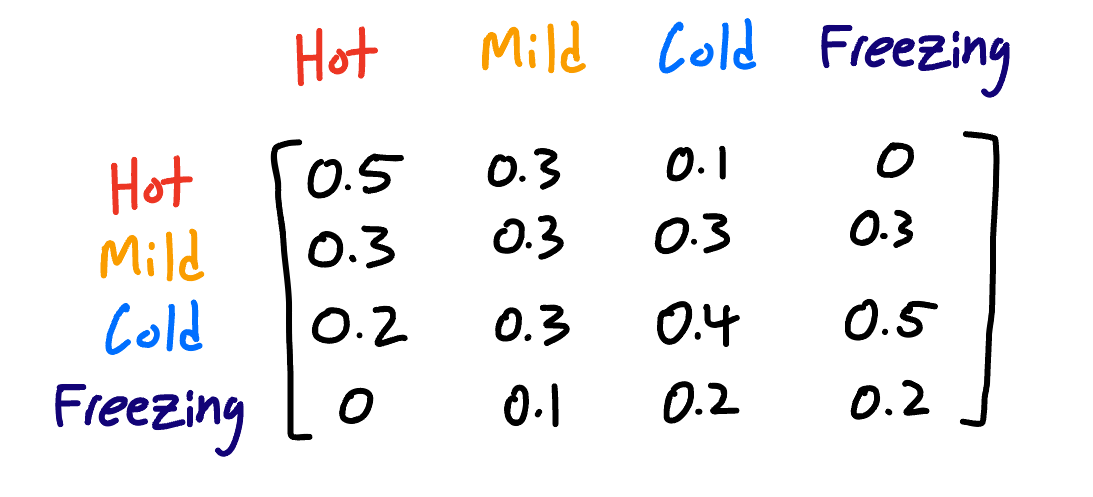

Here's a simple weather example. Let's say there are four states the weather can be in: hot, mild, cold, and freezing. If it's hot today, it probably won't be freezing tomorrow, but it could be mild or even cold. If it's mild today, it could go in any direction, hot or freezing, or even just mild again. Our Markov chain uses a transition matrix to represent the probability that we transition from one state to another. The state at the top of each column represents your current state, and the value in each row represents the probability of transitioning to the corresponding state the next day. So if it's hot today, there's a $50\%$ chance it's hot tomorrow, a $30\%$ chance it's mild, $20\%$ chance it's cold, and a $0\%$ chance it's freezing.

A state distribution vector represents the probability of being in a given state on a given day. If it's hot today, our distribution vector is $x=(1,0,0,0)^T$. If you multiply today's distribution vector by our transition matrix $A$, you get the probability of being in each state tomorrow, $Ax=(0.5,0.3,0.2,0)^T$. Multiply again and you get the probability of each state in two days, $A^2x=(0.36,0.3,0.27,0.07)^T$. It's still probably going to be hot or mild in two days, but it could be cold, or it could even be freezing. In 30 days, $A^{30}x=(0.25,0.3,0.33,0.12)^T$, things are more even, but in 90 days, $A^{30}x=(0.25,0.3,0.33,0.12)^T$, they don't change. This is the steady distribution of our Markov chain. On any given random day, if you don't know anything about the weather or the season, there's a $25\%$ chance it's a sunny day, $30\%$ chance it's mild, $33\%$ chance it's cold, and a $12\%$ chance it's freezing. For this vector, $Ax=x$, meaning $x$ is an eigenvector of $A$.

### Language Modelling

One application of Markov chains is to model language. You can set up a model where the states are the words in the English alphabet, and there's a certain probability of transitioning from one word to the next. If the current word is "I", it's pretty likely the next word could be "am", but it's not at all likely that the next word is "after", "I after" doesn't make sense in English. You could take a few sentences as a training set, and learn how likely it is to transition from one word to the next:

> I am Sam Sam I am.  
Do you like green eggs and ham?  
I do not like them, Sam I am.  
I do not like green eggs and ham.

There are 15 words or states in this set if we include punctuation and capitalization ("ham?" vs "ham." and "Do" vs "do"), and we'll also want a state that tells us where we start and where we stop (often represented as "\\$tart" and "\\$top"). Then our transition matrix will be 17 x 17. If we're at "\\$tart", there's a $3/4$ chance we'll go to "I" and a $1/4$ chance we'll go to "Do". If we're at the word "like", there's a $2/3$ chance we'll go to "green" and a $1/3$ chance we'll go to "them,". Now you can start at the word "\\$tart" and draw from the probability distribution for the next word, then draw from the next one, and the next one until we hit the word "\\$top" to make a brand new sentance! The next word only depends on the word we're at right now, it doesn't know where in the sentence we are, so the grammar won't always line up, but we're starting to generate text!

Note: this is exactly how Large Language Models like ChatGPT work, they just pay attention to all the words that came before them instead of just the one. They look at the sentence so far and guess at what the next word could be, then they look at the sentence including that word and guess the word after that.

So for example, if you were to build a Markov chain that reads all of the quotes by Yoda in the Star Wars movies, you could get a little model that could talk like Yoda! At least, it will sound a little bit like him...

In [1]:
from modules.markov_chains_yoda_quotes import SentenceGenerator

yoda = SentenceGenerator('data/yoda.txt')
print(yoda.babble())
print(yoda.babble())
print(yoda.babble())
print(yoda.babble())
print(yoda.babble())
print(yoda.babble())
print(yoda.babble())
print(yoda.babble())
print(yoda.babble())
print(yoda.babble())

In a fight.
More battalions to say hmmm!
The boy you need.
Strong am sure of: do their duty the Jedi was your rule is, and find your feelings to begin the training.
Fear is the Jedi Temple it we must.
Life creates it, I trained Jedi it was.
Already know you it is.
Nothing more experience.
Surprised, are they.
Stopped they are.
